<a href="https://colab.research.google.com/github/nisharajupal/data_scienc-python-data_set/blob/main/Normal_Disribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np



In [3]:
beml_df = pd.read_csv("/content/BEML (1).csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [5]:
glaxo_df = pd.read_csv("/content/BEML (1).csv")
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [6]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [7]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [8]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

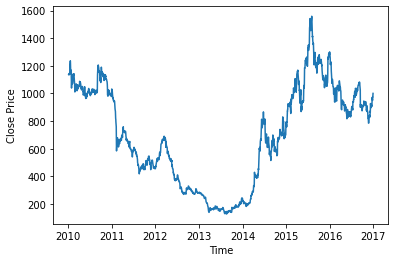

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

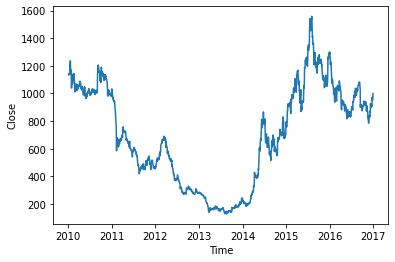

In [10]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [11]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [12]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

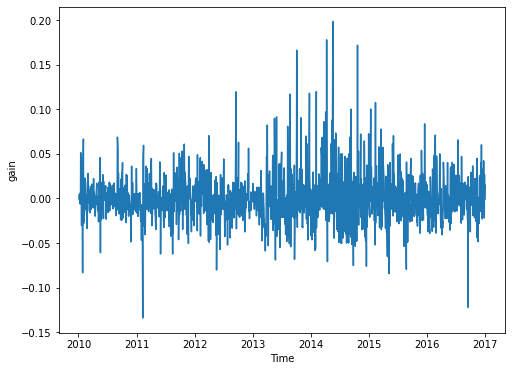

In [13]:
#Plot the gains
plt.figure(figsize = (8, 6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


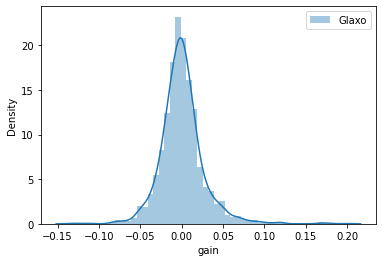

In [14]:
sn.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


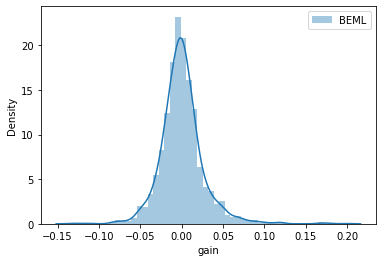

In [15]:
sn.distplot(beml_df.gain, label = 'BEML');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

In [16]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0003
Standard Deviation:  0.0264


In [17]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


In [18]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.22155987503755292

In [19]:
#Probability of making 2% gain or higher in Glaxo
1 - stats.norm.cdf(0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.22769829484075343

In [22]:
#Probability of making 2% gain or higher in BEML
1 - stats.norm.cdf(0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22769829484075343